## Porto Seguro’s Safe Driver Prediction

### Data Preparation & Exploration

    Visual inspection of your data
    Defining the metadata
    Descriptive statistics
    Handling imbalanced classes
    Data quality checks
    Exploratory data visualization
    Feature engineering
    Feature selection
    Feature scaling
   
   
Porto Seguro는 브라질의 자동차 보험 회사입니다. 본 경진 대회의 목적은 어떤 차주가 내년에 보험 청구를 할 확률을 예측하는 겁니다.

<br>데이터는 59만 개의 훈련 데이터와 89만 개의 테스트 데이터로 구성되어 있습니다. 테스트 데이터가 훈련 데이터보다 많습니다. 그리고 Null 값이 np.NaN이 아닌 -1로 되어있습니다. 또한, Feature가 무엇을 뜻하는지 제시하지 않았다는 것이 특징입니다. 보통은 특정 Feature가 무엇을 나타내는지 알려줍니다. 예를 들어 집 값을 예측하는 데이터에서 Feature 중 방 크기(Area)가 있습니다. 방 크기가 크면 집 값이 올라갈 것이라는 예상을 해볼 수 있습니다. 하지만 Porto Seguro 컴피티션에는 각 Feature가 무엇을 의미하는지 알 수 없습니다. 데이터를 안내한 부분에도 나와있지 않고, Feature의 이름으로 유추하기도 어렵습니다. 다만, Feature가 binary인지, categorical인지, oridnal인지, nominal인지만 구분할 수 있을 뿐입니다. 보안상 공개를 하지 않는 것 같습니다.

<br>target은 보험 청구를 한다(=1), 보험 청구를 하지 않는다(=0)인 binary 데이터입니다. 0과 1로 구성되어 있으며 0이 1보다 압도적으로 많습니다. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
# DEBUG = True

# if DEBUG:
#     NROWS = 10000
# else:
#     NROWS = None

In [3]:
#%%time
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
# 데이터 싸이즈가 큰 경우 EDA 할 떄는 샘플링을 해서 진행한다. 
# train = pd.read_csv('train.csv', nrows = None)
# test = pd.read_csv('test.csv',  nrows = None)
# train = train.sample(frac=0.2)

In [5]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [6]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


In [7]:
train.shape

(595212, 59)

In [8]:
test.shape

(892816, 58)

In [9]:
cat_cols = [col for col in train.columns if 'cat' in col]

In [10]:
cat_cols

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [11]:
train[cat_cols[0]].value_counts()

 1    431859
 2    123573
 3     28186
 4     11378
-1       216
Name: ps_ind_02_cat, dtype: int64

In [12]:
#카테고리별  unique() 갯수 표시

for col in cat_cols:
    print(col, train[col].nunique())

ps_ind_02_cat 5
ps_ind_04_cat 3
ps_ind_05_cat 8
ps_car_01_cat 13
ps_car_02_cat 3
ps_car_03_cat 3
ps_car_04_cat 10
ps_car_05_cat 3
ps_car_06_cat 18
ps_car_07_cat 3
ps_car_08_cat 2
ps_car_09_cat 6
ps_car_10_cat 3
ps_car_11_cat 104


In [13]:
print("train set과 test set에서 cloumns차이:", set(train.columns) - set(test.columns))

train set과 test set에서 cloumns차이: {'target'}


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

### meta data

Concretely we will store:

    role: input, ID, target
    level: nominal, interval, ordinal, binary
    keep: True or False
    dtype: int, float, str

In [15]:
data = []
for f in train.columns:
    #role 선언
    if f == 'target':
        role ='target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
    # level 선언
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    else:
        level = 'ordinal'
        
    #Id 를 제외한 다른 변수에 True 를 초기화
    keep = True
    if f =='id':
        keep = False
    
    #dtype정의
    dtype = train[f].dtype
    
    #메타변수 딕셔너리 만들기
    f_dict = {
        'varname': f,
        'role':role,
        'level':level,
        'keep':keep,
        'dtype': dtype
    }
    data.append(f_dict)

In [16]:
meta = pd.DataFrame(data,)

In [17]:
meta = pd.DataFrame(data,columns = ['varname','role','level','keep','dtype'])

In [18]:
meta.set_index('varname', inplace = True)

In [19]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


* Example to extract all normal variable that are not dropped

In [20]:
meta.loc[(meta.level =='normal') & (meta.keep)].index

Index([], dtype='object', name='varname')

* Below the number of variables per role and level are displayed.

In [21]:
pd.DataFrame({'count': meta.groupby(['role','level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


In [22]:
meta.groupby(['role','level'])['role'].size()

role    level   
id      nominal      1
input   binary      17
        interval    10
        nominal     14
        ordinal     16
target  binary       1
Name: role, dtype: int64

* Descriptive statistics

We can also apply the describe method on the dataframe. However, it doesn't make much sense to calculate the mean, std, ... on categorical variables and the id variable. We'll explore the categorical variables visually later.

Thanks to our meta file we can easily select the variables on which we want to compute the descriptive statistics. To keep things clear, we'll do this per data type.

In [23]:
catagorical_feats = [col for col in train.columns if 'cat' in col]

In [24]:
catagorical_feats

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [25]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


* reg variables

only ps_reg_03 has missing values <br>
the range (min to max) differs between the variables. We could apply scaling (e.g. StandardScaler), but it depends on the classifier we will want to use.<br>


* car variables

ps_car_12 and ps_car_15 have missing values<br>
again, the range differs and we could apply scaling.<br>

* calc variables

no missing values<br>
this seems to be some kind of ratio as the maximum is 0.9<br>
all three _calc variables have very similar distributions<br>
<p>Overall, we can see that the range of the interval variables is rather small. Perhaps some transformation (e.g. log) is already applied in order to anonymize the data?</p>

In [26]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


* Binary variables

In [27]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* A priori in the train data is 3.645%, which is strongly imbalanced.
* From the means we can conclude that for most variables the value is zero in most cases.

* Handling imbalanced classes

As we mentioned above the proportion of records with target=1 is far less than target=0. This can lead to a model that has great accuracy but does have any added value in practice. Two possible strategies to deal with this problem are:

* oversampling records with target=1
* undersampling records with target=0

There are many more strategies of course and MachineLearningMastery.com gives a nice overview. As we have a rather large training set, we can go for undersampling.

In [28]:
desired_apriori = 0.10

In [29]:
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

In [30]:
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

In [31]:
# Calculate the undersampling rate and resulting number of records with target=0


In [32]:
undersampling_rate = ((1-desired_apriori)*nb_1) / (nb_0*desired_apriori)

In [33]:
undersampling_rate

0.34043569687437886

In [34]:
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target = 0: {}' .format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}' .format(undersampled_nb_0))

Rate to undersample records with target = 0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


In [35]:
undersampled_idx = shuffle(idx_0, random_state = 37, n_samples = undersampled_nb_0)

In [36]:
idx_list = list(undersampled_idx)  +list(idx_1)

In [37]:
train.loc[idx_list].reset_index(drop = True)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,353762,0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,11,0,1,0,0.6,0.6,0.838153,11,1,-1,0,-1,6,1,1,2,1,26,1,0.368782,0.540603,0.345688,2.000000,0.9,0.3,0.0,3,0,7,3,8,4,8,1,0,4,6,0,1,1,0,0,1
1,845629,0,5,1,7,1,1,1,0,0,0,0,0,0,0,0,5,0,0,1,0.9,0.6,0.728440,7,1,-1,0,-1,14,1,1,2,1,104,1,0.424264,0.382953,0.378814,0.000000,0.2,0.0,0.6,1,1,7,5,10,4,11,3,0,3,7,0,0,0,0,1,0
2,1449185,0,4,1,3,1,0,1,0,0,0,0,0,0,0,0,4,1,0,0,0.9,0.6,0.869267,11,1,-1,0,-1,3,1,1,2,1,15,3,0.400000,0.814271,0.402368,3.316625,0.3,0.9,0.1,4,1,8,5,10,2,8,7,2,3,10,0,1,0,1,0,1
3,834066,0,6,1,6,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.6,1.5,1.705872,6,1,-1,0,0,1,1,1,0,1,74,2,0.400000,0.838387,0.378418,3.605551,0.8,0.4,0.1,3,3,7,2,11,3,10,2,2,0,14,0,0,0,0,0,0
4,436189,0,5,1,5,0,0,0,0,1,0,0,0,0,0,0,10,1,0,0,0.8,0.8,1.086566,5,1,-1,0,-1,0,0,1,0,1,78,3,0.400000,0.905777,0.384838,3.605551,0.6,0.5,0.9,3,3,5,2,9,1,6,5,1,6,8,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216935,1487473,1,5,1,7,0,3,0,0,1,0,0,0,0,0,0,8,0,1,0,0.6,0.4,1.537652,11,0,0,0,1,5,1,1,2,1,104,1,0.424264,1.269111,0.384708,3.162278,0.5,0.1,0.5,3,4,9,1,10,2,9,10,1,5,7,0,1,1,0,0,0
216936,1487566,1,1,1,5,0,0,0,0,1,0,0,0,0,0,0,4,0,0,1,0.3,0.4,-1.000000,11,0,-1,0,-1,15,1,1,2,1,5,2,0.424264,0.756979,0.400000,2.000000,0.3,0.4,0.6,1,1,8,2,9,5,9,9,2,1,5,0,1,0,0,0,0
216937,1487716,1,0,1,6,1,0,0,1,0,0,0,0,0,0,0,9,0,1,0,0.9,0.3,0.711952,11,1,0,0,1,7,1,1,1,1,104,3,0.400000,0.970654,0.372424,3.464102,0.5,0.4,0.6,2,2,8,2,8,4,10,3,2,1,6,0,1,1,0,0,0
216938,1487748,1,0,2,2,0,0,1,0,0,0,0,0,0,0,0,2,0,0,1,0.6,0.1,0.577170,7,1,1,0,0,11,1,0,2,1,104,2,0.316228,0.876295,0.320780,3.741657,0.5,0.2,0.6,3,0,9,3,10,4,11,5,0,4,4,0,0,1,0,1,0


* Data Quailty Checks
* Checking missing values

In [38]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 216 records (0.04%) with missing values
Variable ps_ind_04_cat has 83 records (0.01%) with missing values
Variable ps_ind_05_cat has 5809 records (0.98%) with missing values
Variable ps_reg_03 has 107772 records (18.11%) with missing values
Variable ps_car_01_cat has 107 records (0.02%) with missing values
Variable ps_car_02_cat has 5 records (0.00%) with missing values
Variable ps_car_03_cat has 411231 records (69.09%) with missing values
Variable ps_car_05_cat has 266551 records (44.78%) with missing values
Variable ps_car_07_cat has 11489 records (1.93%) with missing values
Variable ps_car_09_cat has 569 records (0.10%) with missing values
Variable ps_car_11 has 5 records (0.00%) with missing values
Variable ps_car_12 has 1 records (0.00%) with missing values
Variable ps_car_14 has 42620 records (7.16%) with missing values
In total, there are 13 variables with missing values


* ps_car_03_cat and ps_car_05_cat have a large proportion of records with missing values. Remove these variables.
* For the other categorical variables with missing values, we can leave the missing value -1 as such.
* ps_reg_03 (continuous) has missing values for 18% of all records. Replace by the mean.
* ps_car_11 (ordinal) has only 5 records with misisng values. Replace by the mode.
* ps_car_12 (continuous) has only 1 records with missing value. Replace by the mean.
* ps_car_14 (continuous) has missing values for 7% of all records. Replace by the mean.

In [39]:
# Dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)

In [40]:
meta.loc[(vars_to_drop),'keep'] = False 

In [41]:
# temp_series = train[['ps_car_01_cat', 'ps_car_02_cat', 'ps_reg_03']].groupby(['ps_car_01_cat', 'ps_car_02_cat'])

In [42]:
# temp_series.reset_index()

In [43]:
mean_imp = SimpleImputer(missing_values = -1, strategy = 'mean')
mode_imp = SimpleImputer(missing_values = -1, strategy = 'most_frequent' )

In [44]:
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

* Checking the cardinality of the categorical variables

In [45]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index


In [46]:
v

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat',
       'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [47]:

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


### 3강

In [48]:
# train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
#                              test["ps_car_11_cat"], 
#                              target=train.target, 
#                              min_samples_leaf=100,
#                              smoothing=10,
#                              noise_level=0.01)

In [49]:
trn_series=train["ps_car_11_cat"]
tst_series=test["ps_car_11_cat"]
# trn_series = pd.DataFrame(trn_series)
# tst_series = pd.DataFrame(tst_series)
target=train.target 
min_samples_leaf=100 
smoothing=10
noise_level=0.01

In [50]:
assert len(trn_series) == len(target)

In [51]:
assert trn_series.name == tst_series.name

In [52]:
temp = pd.concat([trn_series, target], axis =1)

In [53]:
temp.groupby(by = trn_series.name)[target.name].agg(['mean','count' ])

,mean,count
ps_car_11_cat,,
1,0.040528,3331
2,0.037995,2553
3,0.051177,3185
4,0.060777,1596
5,0.041956,12513
...,...,...
100,0.052418,4445
101,0.038289,7339
102,0.033761,2103


In [54]:
# agg()방법 2
temp.groupby(by = trn_series.name)[target.name].mean()

ps_car_11_cat
1      0.040528
2      0.037995
3      0.051177
4      0.060777
5      0.041956
         ...   
100    0.052418
101    0.038289
102    0.033761
103    0.026667
104    0.045015
Name: target, Length: 104, dtype: float64

In [55]:
#agg()방법 3 함수

def max_min(x):
    return x.max() - x.min()

In [56]:
temp.groupby(by = trn_series.name)[target.name].agg(['mean','count' ,max_min])

,mean,count,max_min
ps_car_11_cat,,,
1,0.040528,3331,1
2,0.037995,2553,1
3,0.051177,3185,1
4,0.060777,1596,1
5,0.041956,12513,1
...,...,...,...
100,0.052418,4445,1
101,0.038289,7339,1
102,0.033761,2103,1


In [57]:
averages = temp.groupby(by = trn_series.name)[target.name].agg(['mean','count'])

In [58]:
smoothing = 1 / (1+ np.exp(-(averages["count"]- min_samples_leaf)/smoothing))

In [59]:
prior = target.mean()

In [60]:
averages[target.name] = prior * (1-smoothing) + averages['mean']*smoothing

In [61]:
averages.drop(['mean','count'], axis = 1, inplace = True)

In [62]:
ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

In [63]:
ft_trn_series.index = trn_series.index

In [64]:
# test date에도 똑같이 
ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

In [65]:
ft_tst_series.index = tst_series.index

In [66]:
0.01* np.random.randn(ft_trn_series.shape[0])

array([ 0.00032199,  0.00850604, -0.00188946, ...,  0.01048971,
       -0.00194959,  0.0066377 ])

In [67]:
# Script by https://www.kaggle.com/ogrellier
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [68]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)

In [69]:
train_encoded

0         0.039073
1         0.024019
2         0.031586
3         0.045122
4         0.026061
            ...   
595207    0.039027
595208    0.060471
595209    0.039090
595210    0.038079
595211    0.035869
Name: ps_car_11_cat_mean, Length: 595212, dtype: float64

In [70]:
train['ps_car_11_cat_te'] = train_encoded

In [71]:
train.drop('ps_car_11_cat', axis = 1, inplace = True)

In [72]:
meta.loc['ps_car_c11_cat', 'keep']  = False

In [73]:
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

In [102]:
meta.loc['ps_car_11_cat', 'keep'] = False

### EDA

In [103]:
v = meta[(meta.level == 'nominal')&(meta.keep)].index

In [104]:
v 

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat',
       'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat'],
      dtype='object', name='varname')

In [105]:
sns.set(font_scale = 2)

In [106]:
for f in v:
    break

In [107]:
f

'ps_ind_02_cat'

<Figure size 432x288 with 0 Axes>

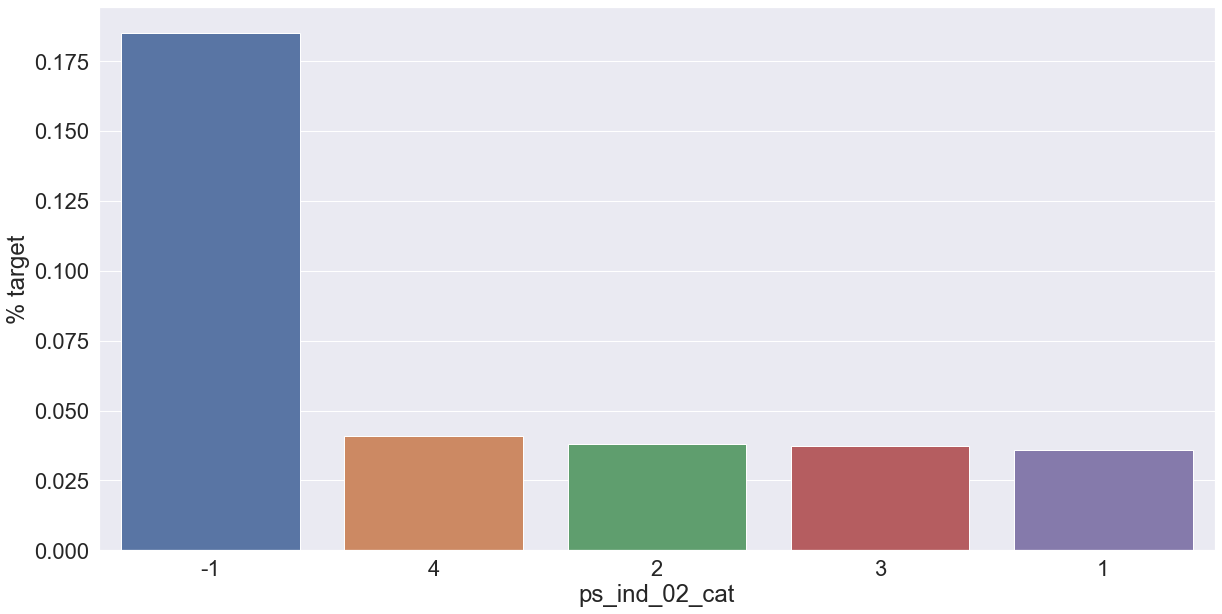

In [108]:
plt.figure()
fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    
cat_perc = train[[f, 'target']].groupby([f], as_index = False).mean()
cat_perc.sort_values(by='target',ascending = False, inplace = True )
    
sns.barplot(ax = ax, x = f, y = 'target', data = cat_perc, order = cat_perc[f])
plt.ylabel('% target')
plt.xlabel(f)
plt.tick_params(axis='both', which='major')
plt.show();

<Figure size 432x288 with 0 Axes>

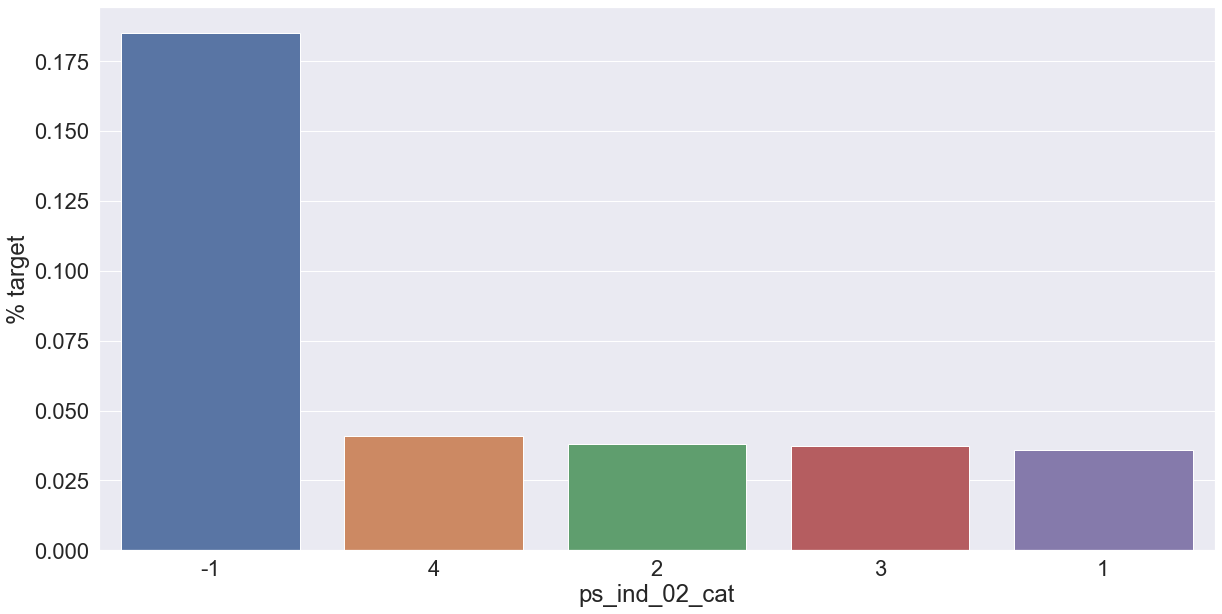

<Figure size 432x288 with 0 Axes>

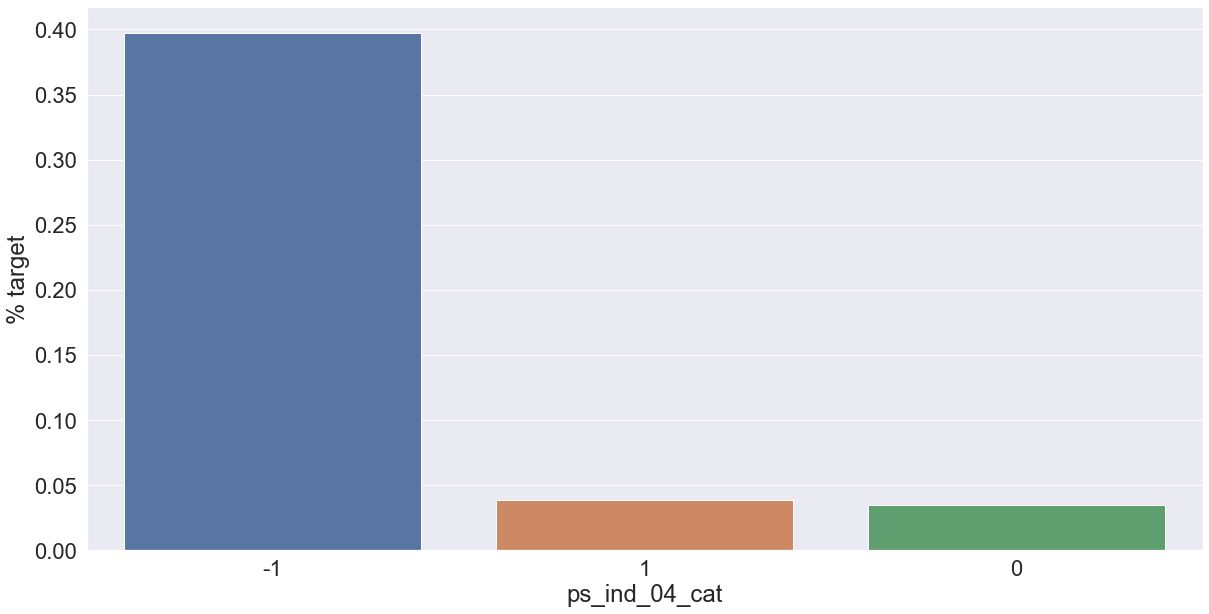

<Figure size 432x288 with 0 Axes>

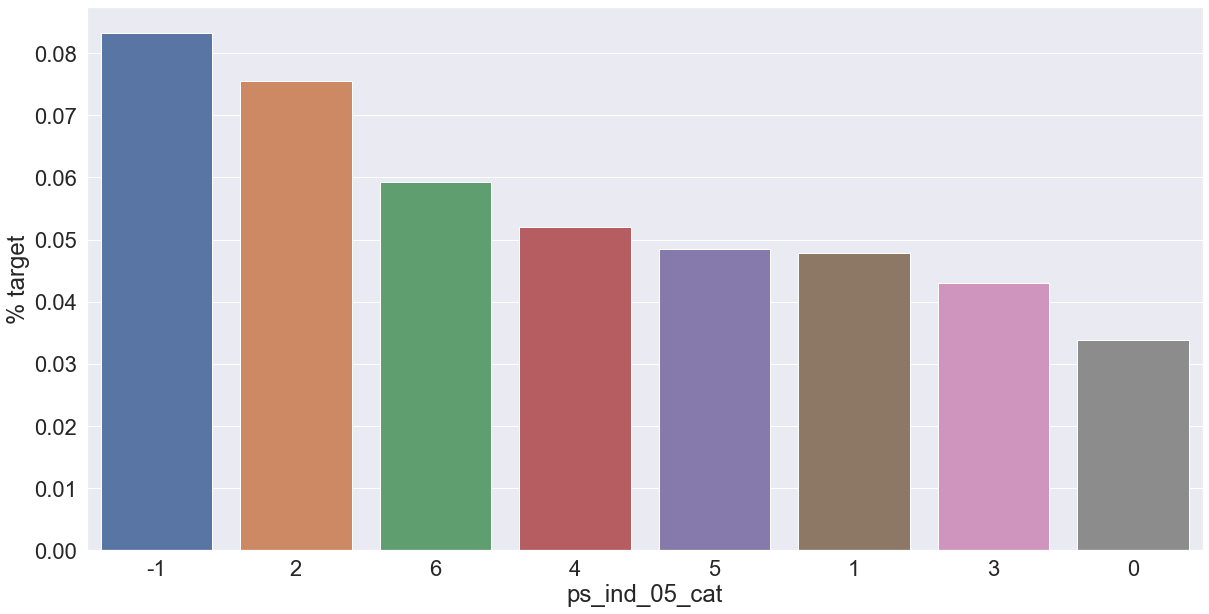

<Figure size 432x288 with 0 Axes>

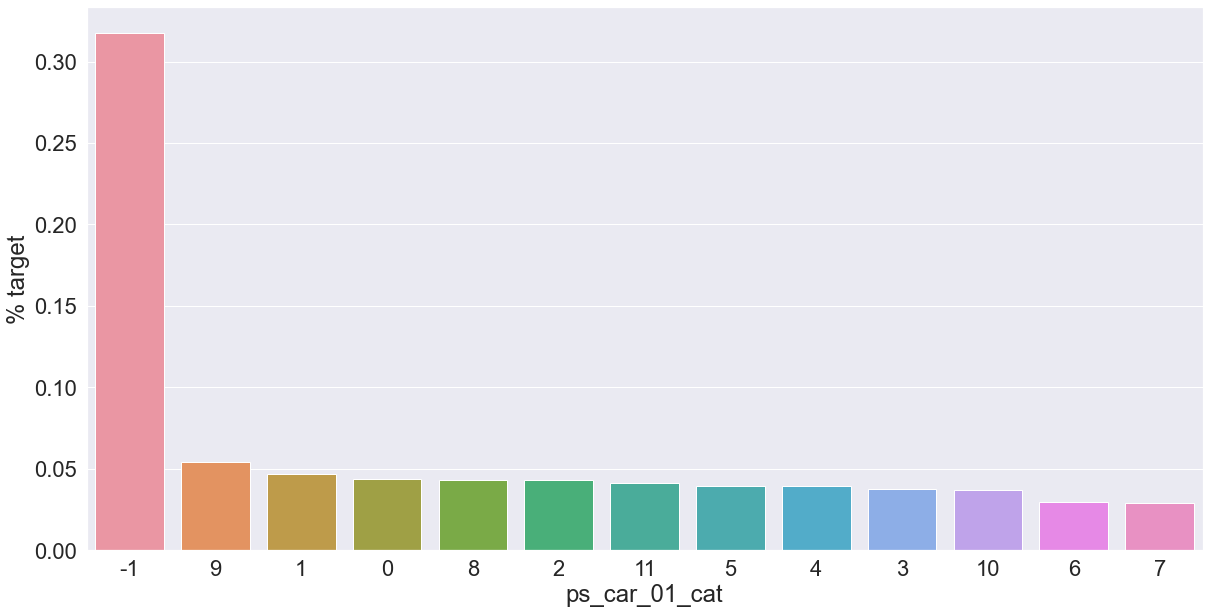

<Figure size 432x288 with 0 Axes>

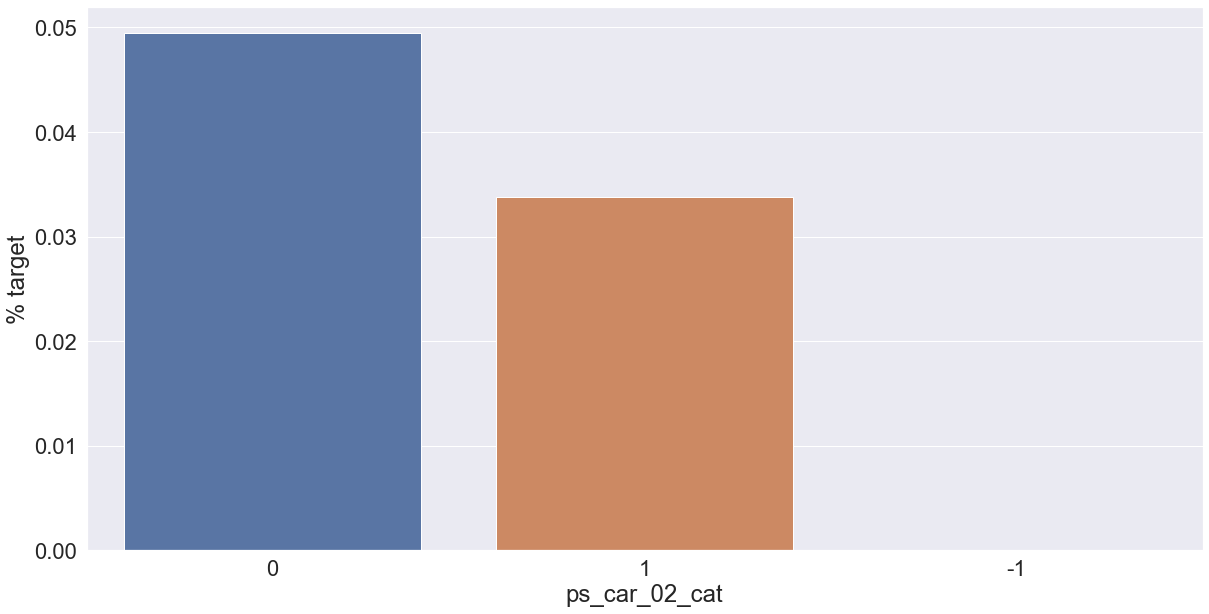

<Figure size 432x288 with 0 Axes>

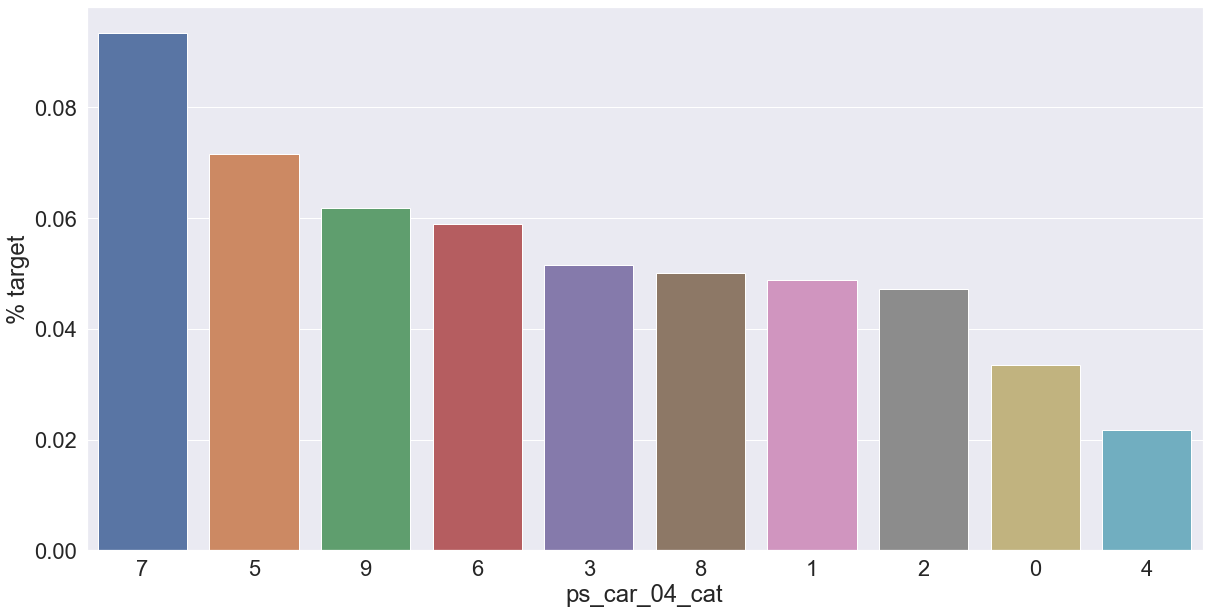

<Figure size 432x288 with 0 Axes>

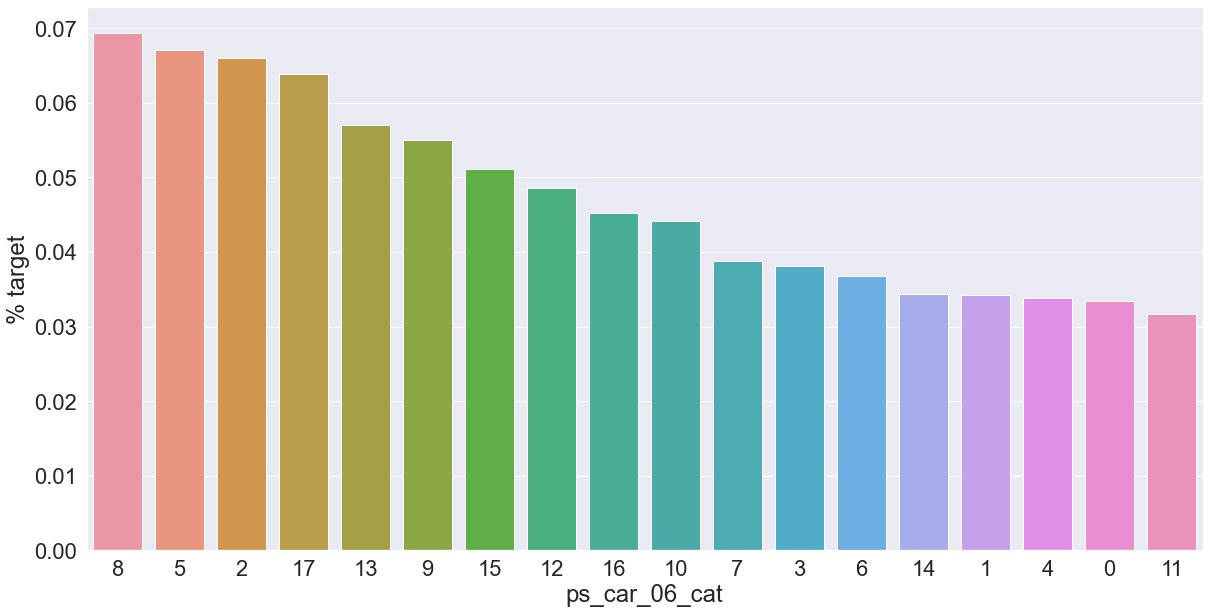

<Figure size 432x288 with 0 Axes>

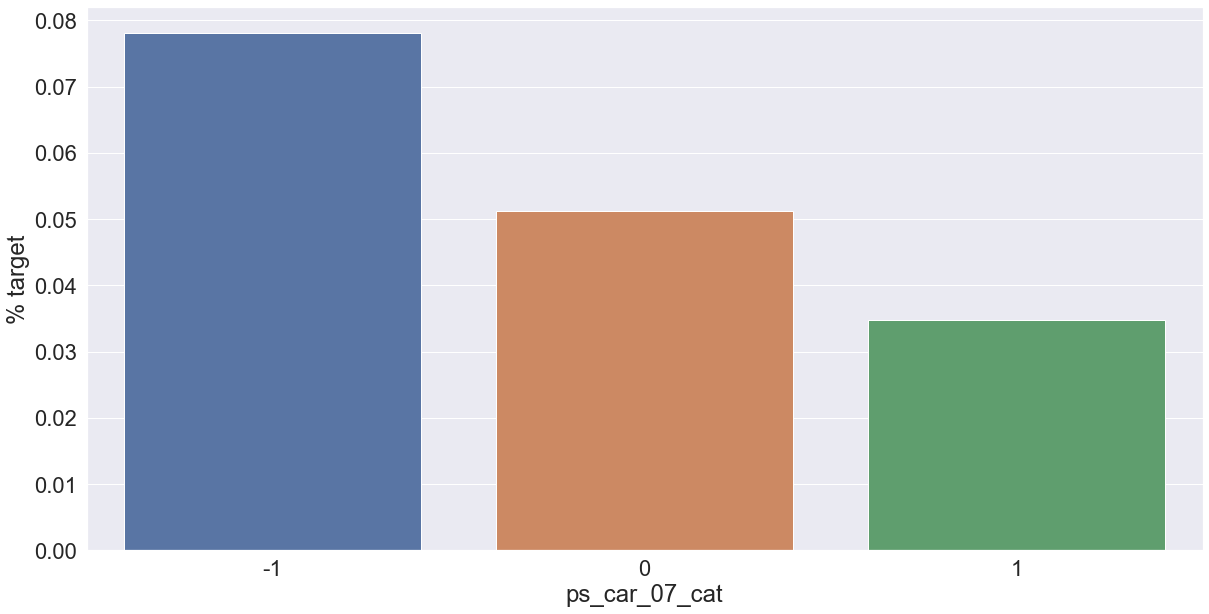

<Figure size 432x288 with 0 Axes>

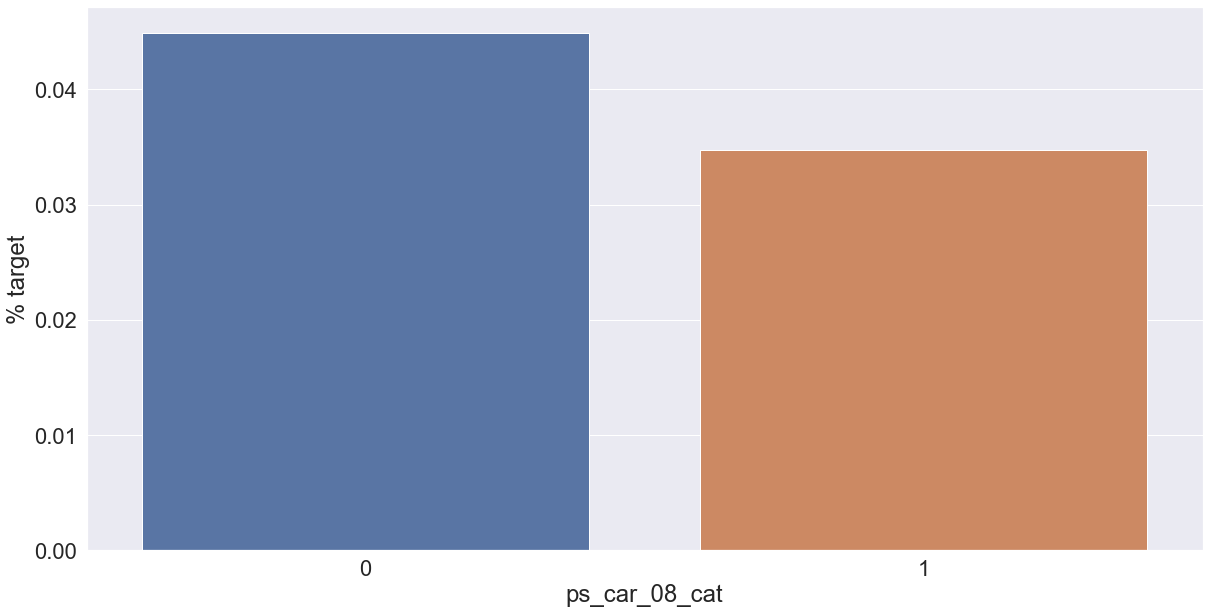

<Figure size 432x288 with 0 Axes>

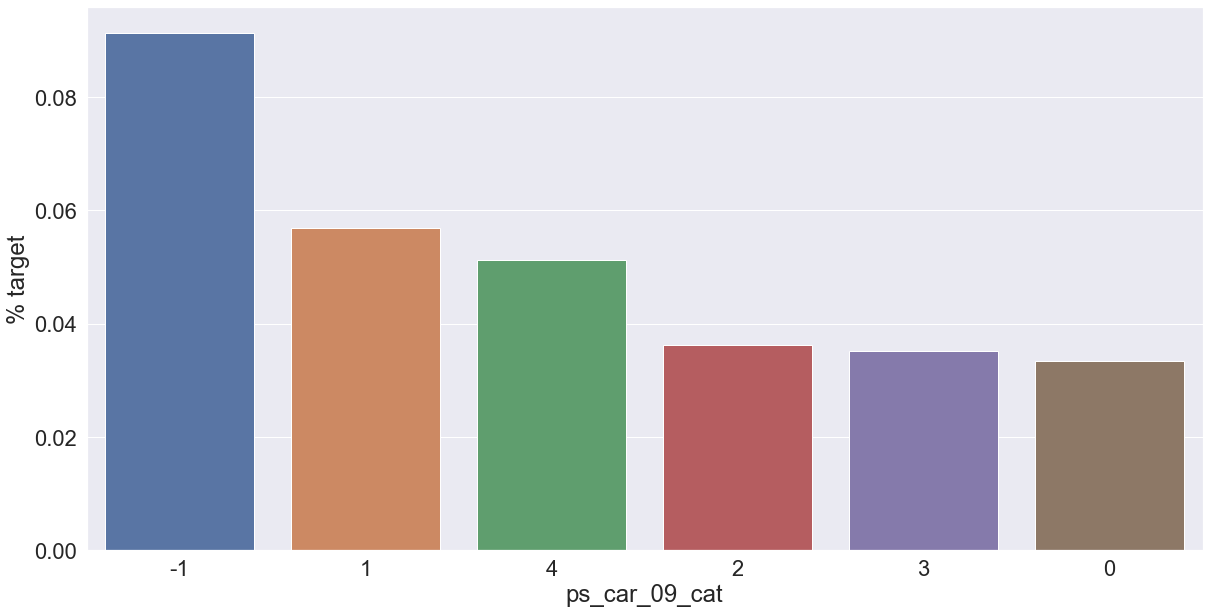

<Figure size 432x288 with 0 Axes>

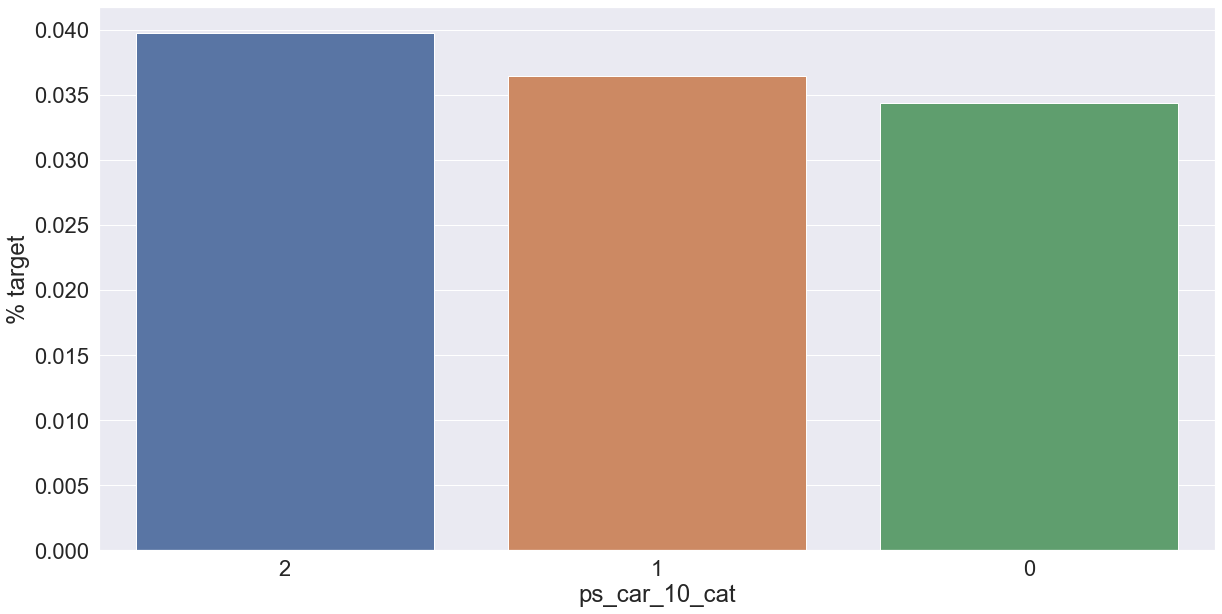

In [109]:
for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    
    cat_perc = train[[f, 'target']].groupby([f], as_index = False).mean()
    cat_perc.sort_values(by='target',ascending = False, inplace = True )
    
    sns.barplot(ax = ax, x = f, y = 'target', data = cat_perc, order = cat_perc[f])
    plt.ylabel('% target')
    plt.xlabel(f)
    plt.tick_params(axis='both', which='major')
    plt.show();

In [96]:
f = 'ps_ind_04_cat'

In [99]:
cat_perc = train[[f, 'target']].groupby([f], as_index = False).agg(['mean', 'count'])

In [100]:
cat_perc

target        
                   mean   count
ps_ind_04_cat                  
-1             0.397590      83
 0             0.034790  346965
 1             0.038644  248164

- As can see from the variables with missing values, it is a good idea to keep the missing values as a seperate, instead od replaceing item by the mod for instance

 - the customers with a missing values appeart to have a much higher (in some cases much lower) probability to ask for an insurance claim

### Interval variables

- Checking tje correlrations between interval variables, A heatmap is a good way to vsiaulize the correlation between variables, the code below is based on an example by Mi

In [110]:
v = meta[(meta.level == 'interval') & (meta.keep)].index

In [111]:
v

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object', name='varname')

In [112]:
correlations = train[v].corr

In [84]:
cmap = sns.diverging_palette(220, 10, as_cmap = True)

In [85]:
sns.set(font_scale = 1)

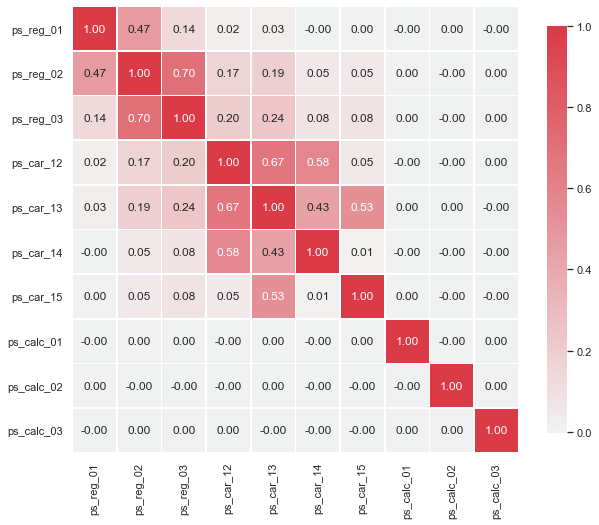

In [86]:
def corr_heatmap(v):
    correlations = train[v].corr()

    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();
    
v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

There are a strong correlations between the variables:

- ps_reg_02 and ps_reg_03 (0.7)
- ps_car_12 and ps_car13 (0.67)
- ps_car_12 and ps_car14 (0.58)
- ps_car_13 and ps_car15 (0.67)

Seaborn has some handy plots to visualize the (linear) relationship between variables. We could use a pairplot to visualize the relationship between the variables. But because the heatmap already showed the limited number of correlated variables, we'll look at each of the highly correlated variables separately.
NOTE: I take a sample of the train data to speed up the process.

In [87]:
s = train.sample(frac=0.1)

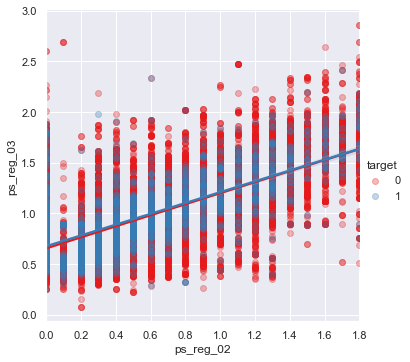

In [88]:
sns.lmplot(x = 'ps_reg_02', y = 'ps_reg_03', data =s, hue = 'target', palette =  'Set1',  scatter_kws = {'alpha':0.3})
plt.show()

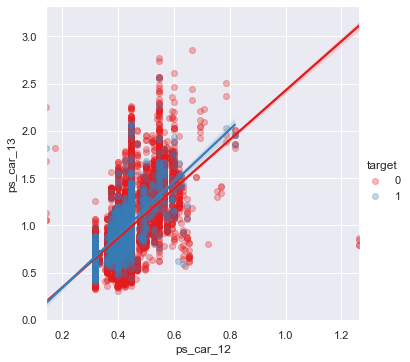

In [89]:
sns.lmplot(x = 'ps_car_12', y = 'ps_car_13', data =s, hue = 'target', palette =  'Set1',  scatter_kws = {'alpha':0.3})
plt.show()

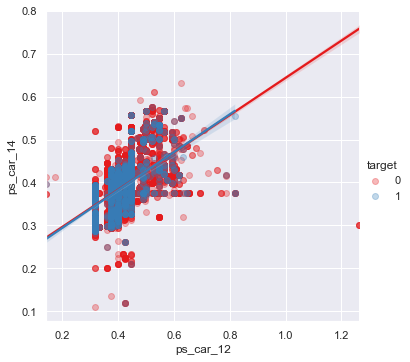

In [90]:
sns.lmplot(x = 'ps_car_12', y = 'ps_car_14', data =s, hue = 'target', palette =  'Set1',  scatter_kws = {'alpha':0.3})
plt.show()

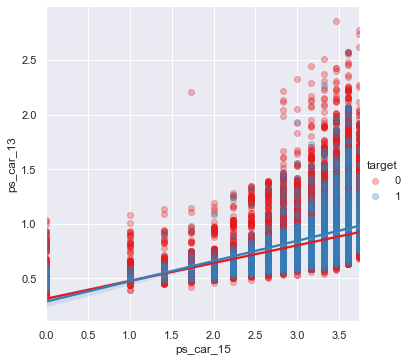

In [91]:
sns.lmplot(x = 'ps_car_15', y = 'ps_car_13', data =s, hue = 'target', palette =  'Set1',  scatter_kws = {'alpha':0.3})
plt.show()

Allright, so now what? How can we decide which of the correlated variables to keep? We could perform Principal Component Analysis (PCA) on the variables to reduce the dimensions. In the AllState Claims Severity Competition I made this kernel to do that. But as the number of correlated variables is rather low, we will let the model do the heavy-lifting.

### Checking the correlations between ordinal variables

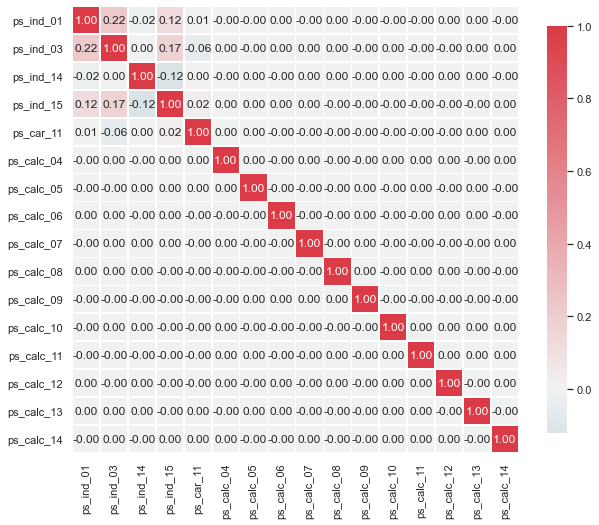

In [92]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

## 4강 - Feature engineering

- Creating dummy variables

The values of the categorical variables do not represent any order or magnitude. For instance, category 2 is not twice the value of category 1. Therefore we can create dummy variables to deal with that. We drop the first dummy variable as this information can be derived from the other dummy variables generated for the categories of the original variable.

In [113]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

In [114]:
train.shape[1]

57

In [115]:
v

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat',
       'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat'],
      dtype='object', name='varname')

In [116]:
train = pd.get_dummies(train, columns = v, drop_first = True)

In [118]:
train.shape

(595212, 109)

* Creating interation variables

In [117]:
v = meta[(meta.level == 'interval') & (meta.keep)].index

In [119]:
poly = PolynomialFeatures(degree=2, interaction_only = True, include_bias=False)

In [120]:
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))

In [121]:
interactions.drop(v, axis=1, inplace=True)

In [122]:
train.shape

(595212, 109)

In [123]:
train = pd.concat([train, interactions], axis = 1)

In [124]:
pd.concat([train, interactions], axis = 1)

,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_11_cat_te,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,...,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02 ps_calc_03,ps_reg_01 ps_reg_02,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02 ps_calc_03
0,7,0,2,5,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1,0.039073,0,1,0,0,...,1.802776,0.721110,0.30,0.12,0.10,0.14,0.502649,0.280000,0.618575,0.259567,2.523886,0.42,0.35,0.14,0.143614,0.080000,0.176736,0.074162,0.721110,0.12,0.10,0.04,0.287228,0.634544,0.266268,2.589039,0.430842,0.359035,0.143614,0.353472,0.148324,1.442221,0.240000,0.200000,0.080000,0.327677,3.186150,0.530207,0.441839,0.176736,1.336974,0.222486,0.185405,0.074162,2.163331,1.802776,0.721110,0.30,0.12,0.10
1,9,0,1,7,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0,0.024019,1,0,0,0,...,0.244949,0.734847,0.03,0.09,0.03,0.32,0.612862,0.252982,0.495053,0.310973,1.959592,0.24,0.08,0.24,0.306431,0.126491,0.247527,0.155486,0.979796,0.12,0.04,0.12,0.242255,0.474062,0.297787,1.876499,0.229823,0.076608,0.229823,0.195687,0.122923,0.774597,0.094868,0.031623,0.094868,0.240544,1.515785,0.185645,0.061882,0.185645,0.952155,0.116615,0.038872,0.116615,0.734847,0.244949,0.734847,0.03,0.09,0.03
2,13,0,5,9,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,0.894047,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0,0.031586,0,0,0,1,...,2.321637,0.331662,0.35,0.05,0.07,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.282723,0.573608,0.310480,2.965220,0.447024,0.625833,0.089405,0.202887,0.109818,1.048809,0.158114,0.221359,0.031623,0.222807,2.127899,0.320793,0.449110,0.064159,1.151781,0.173638,0.243093,0.034728,1.658312,2.321637,0.331662,0.35,0.05,0.07
3,16,0,0,2,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0,0.045122,1,0,0,0,...,1.800000,0.200000,0.54,0.06,0.09,0.18,0.522853,0.336749,0.488654,0.265462,1.800000,0.54,0.81,0.09,0.116190,0.074833,0.108590,0.058992,0.400000,0.12,0.18,0.02,0.217371,0.315425,0.171355,1.161895,0.348569,0.522853,0.058095,0.203153,0.110363,0.748331,0.224499,0.336749,0.037417,0.160147,1.085898,0.325769,0.488654,0.054295,0.589915,0.176975,0.265462,0.029496,1.200000,1.800000,0.200000,0.54,0.06,0.09
4,17,0,0,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3

#### Feature Selection

* Removing features with low or zero variance

Personally, I prefer to let the classifier algorithm chose which features to keep. But there is one thing that we can do ourselves. That is removing features with no or a very low variance. Sklearn has a handy method to do that: VarianceThreshold. By default it removes features with zero variance. This will not be applicable for this competition as we saw there are no zero-variance variables in the previous steps. But if we would remove features with less than 1% variance, we would remove 31 variables.

In [125]:
selector = VarianceThreshold(threshold=0.01)

In [126]:
selector.fit(train.drop(['id', 'target'], axis=1))

VarianceThreshold(threshold=0.01)

In [ ]:
v = train.drop(['id', 'target'], axis=1)

In [129]:
selector.get_support().sum()

125

In [130]:
f = np.vectorize(lambda x: not x)

In [131]:
f(selector.get_support())

array([False, False, False, False, False, False,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True, False, False, False,
        True, False, False,  True, False, False,  True, False, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [132]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

27 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_0', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12 ps_car_14']


* We would lose rather many variables if we would select based on variance. But because we do not have so many variables, we'll let the classifier chose. For data sets with many more variables this could reduce the processing time.

#### Selecting features with a Random Forest and SelectFromModel

Here we'll base feature selection on the feature importances of a random forest. With Sklearn's SelectFromModel you can then specify how many variables you want to keep. You can set a threshold on the level of feature importance manually. But we'll simply select the top 50% best variables.

In [137]:
X_train = train.drop(['id', 'target'], axis = 1)
y_train = train['target']

In [143]:
feat_labels = X_train.columns

In [138]:
rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

In [139]:
rf.fit(X_train[:1000], y_train[:1000])

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=0)

In [140]:
importances = rf.feature_importances_

In [141]:
indices = np.argsort(rf.feature_importances_)[::-1]

In [144]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

 1) ps_reg_03 ps_calc_03           0.022642
 2) ps_car_12 ps_car_14            0.021082
 3) ps_car_14                      0.020946
 4) ps_reg_03 ps_car_14            0.020517
 5) ps_reg_03 ps_car_12            0.020311
 6) ps_car_14 ps_calc_01           0.019176
 7) ps_reg_01 ps_car_14            0.018462
 8) ps_reg_03                      0.018340
 9) ps_reg_03 ps_calc_01           0.017092
10) ps_reg_03 ps_car_13            0.016986
11) ps_car_12 ps_calc_03           0.016764
12) ps_calc_13                     0.016413
13) ps_reg_03 ps_car_15            0.016384
14) ps_calc_11                     0.015631
15) ps_car_13 ps_calc_03           0.015574
16) ps_reg_01 ps_car_13            0.015046
17) ps_car_11_cat_te               0.015029
18) ps_reg_03 ps_calc_02           0.014801
19) ps_ind_03                      0.014222
20) ps_calc_14                     0.014064
21) ps_reg_02 ps_calc_03           0.013994
22) ps_car_13 ps_calc_02           0.013945
23) ps_car_13 ps_car_15         

With SelectFromModel we can specify which prefit classifier to use and what the threshold is for the feature importances. 

With the get_support method we can then limit the number of variables in the train data.

In [146]:
sfm = SelectFromModel(rf, threshold = 'median', prefit = True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 152
Number of features after selection: 76


In [147]:
train = train[selected_vars + ['target']]

In [148]:
train.shape

(595212, 77)

#### Feature scaling

As mentioned before, we can apply standard scaling to the training data. Some classifiers perform better when this is done.

In [149]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1))

array([[ 0.0502179 ,  0.21359383,  1.04343978, ...,  0.48990461,
        -0.41074456, -0.51100682],
       [-0.45386836,  0.95436209, -1.2125985 , ..., -0.85992019,
        -0.56034962, -0.86002112],
       [ 1.56247669,  1.69513035,  1.32544457, ...,  0.73987216,
        -0.75982302, -0.66058438],
       ...,
       [-0.45386836,  2.06551448,  1.32544457, ..., -1.00990072,
        -0.41074456, -1.00959868],
       [ 1.56247669, -0.52717443,  1.32544457, ..., -1.00990072,
        -1.00916478, -1.00959868],
       [-0.95795462,  1.32474622, -0.08457936, ..., -1.00990072,
        -0.01179775, -1.00959868]])

### Conclusion

Hopefully this notebook helped you with some tips on how to start with this competition. Feel free to vote for it. And if you have questions, post a comment.

## stacking
* [참고 kaggle 페이지](https://www.kaggle.com/rshally/porto-xgb-lgb-kfold-lb-0-282)

In [151]:
!pip install xgboost 

In [153]:
!pip install lightgbm 

In [155]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
import gc

print('loading files...')
train = pd.read_csv('train.csv', na_values=-1, nrows = 10000)
test = pd.read_csv('test.csv', na_values=-1, nrows = 10000)
col_to_drop = train.columns[train.columns.str.startswith('ps_calc_')]
train = train.drop(col_to_drop, axis=1)  
test = test.drop(col_to_drop, axis=1)  

for c in train.select_dtypes(include=['float64']).columns:
    train[c]=train[c].astype(np.float32)
    test[c]=test[c].astype(np.float32)
for c in train.select_dtypes(include=['int64']).columns[2:]:
    train[c]=train[c].astype(np.int8)
    test[c]=test[c].astype(np.int8)    

print(train.shape, test.shape)

loading files...
(10000, 39) (10000, 38)


In [ ]:
# custom objective function (similar to auc)

def gini(y, pred):
    g = np.asarray(np.c_[y, pred, np.arange(len(y)) ], dtype=np.float)
    g = g[np.lexsort((g[:,2], -1*g[:,1]))]
    gs = g[:,0].cumsum().sum() / g[:,0].sum()
    gs -= (len(y) + 1) / 2.
    return gs / len(y)

def gini_xgb(pred, y):
    y = y.get_label()
    return 'gini', gini(y, pred) / gini(y, y)

def gini_lgb(preds, dtrain):
    y = list(dtrain.get_label())
    score = gini(y, preds) / gini(y, y)
    return 'gini', score, True

In [ ]:
# xgb
params = {'eta': 0.02, 'max_depth': 4, 
          'subsample': 0.9, 
          'colsample_bytree': 0.9, 
          'objective': 'binary:logistic', 
          'eval_metric': 'auc', 
          'silent': True}

In [156]:
X = train.drop(['id','target'], axis = 1)

In [157]:
features = X.columns 

In [158]:
X = X.values

In [159]:
y = train['target'].values

In [160]:
sub = test['id'].to_frame()

In [161]:
sub['target'] = 0

In [164]:
nrounds=200  # need to change to 2000
kfold = 2  # need to change to 5
skf = StratifiedKFold(n_splits=kfold, )#random_state=0

In [165]:
for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    break

In [166]:
y.mean()

0.0379

In [ ]:
y[train_index]